## Table of Contents
- [Project Overview](#project-overview)
- [Dataset Overview](#dataset-overview)
- [Importing Libraries](#importing-libraries)
- [Data Loading and Initial Exploration](#data-loading-and-initial-exploration)
- [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Feature Engineering](#feature-engineering)
- [Model Building and Evaluation](#model-building-and-evaluation)
- [Results and Key Insights](#results-and-key-insights)
- [Business Recommendations](#business-recommendations)
- [Future Considerations](#future-considerations)
- [Footer](#footer)

## Project Overview

This project simulates a real-world scenario for a data analyst working with a real estate client.

A Real Estate Investment Trust (REIT) is planning to expand into the residential housing market and needs to evaluate the potential value of properties based on their features.

Accurate price estimates enable the firm to identify undervalued opportunities, assess potential returns, and scale investment decisions with consistency—without relying solely on manual appraisals or third-party pricing tools.

### Problem Statement

Use property features to predict the market price of a house and support data-driven investment decisions.

### Objective

The objective is to develop and evaluate predictive models that estimate house prices using features such as square footage, number of bedrooms, and number of floors. The project includes data cleaning, exploratory analysis, and regression-based model comparisons to determine the most effective pricing approach.


## Dataset Overview

The dataset used in this case study is a refined version of a publicly available housing dataset from [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). It includes records of residential properties with features such as:

- Square footage
- Number of bedrooms
- Number of floors
- Sale price (target variable)

The dataset was pre-cleaned for instructional purposes and adapted to focus on structured regression modeling.

## Importing Libraries

In this section, we import all the necessary Python libraries for data manipulation, visualization, and modeling.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

## Data Loading and Initial Exploration

In this section, we load the dataset and perform an initial inspection to understand its structure, data types, and any immediate issues that need attention.


In [12]:
data_path = "data/housing_price.csv"
df = pd.read_csv(data_path)

print("Dataset loaded successfully with", df.shape[0], "rows and", df.shape[1], "columns.")

Dataset loaded successfully with 21613 rows and 22 columns.


In [9]:
# First look

df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# Checking column names & data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [15]:
# Statistical summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21613.0,1.080600e+04,6.239280e+03,0.000000e+00,5.403000e+03,1.080600e+04,1.620900e+04,2.161200e+04
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21600.0,3.372870e+00,9.266567e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21603.0,2.115736e+00,7.689959e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


### Initial Observations

- The dataset contains 21,613 rows and 22 columns.
- `Unnamed: 0` appears to be an unnecessary index column and will be dropped.
- A few columns contain missing values, notably `bedrooms` and `bathrooms`.
- The `date` column is stored as an object and needs to be converted to datetime.
- The `id` column is a unique identifier and will not be used for modeling.
- `yr_renovated` contains many zeros, which likely represent non-renovated properties and may be transformed into a binary feature.
- The target variable `price` is present, numeric, and appropriate for regression modeling.


## Data Cleaning and Preprocessing

We address missing values, duplicates, and data formatting issues to prepare the dataset for analysis and modeling.


In [19]:
# Dropping columns

df.drop(columns=["Unnamed: 0","id"], inplace=True)
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
# Checking for duplicates

df.duplicated().sum()

np.int64(0)

In [23]:
# Identifying the columns with missing values

print("Columns containing missing values are: ")
df.isnull().sum()[df.isnull().sum() > 0]


Columns containing missing values are: 


bedrooms     13
bathrooms    10
dtype: int64

### Handling Missing Values

The columns `bedrooms` and `bathrooms` contain a small number of missing values—13 and 10 respectively—out of over 21,000 rows. Since both are important numerical features, dropping the rows would result in unnecessary data loss.

Instead, the missing values are imputed using the **median** of each column. Median imputation is a robust choice for numerical features, especially when the data may be skewed or represents discrete quantities like bedroom count. This helps preserve the dataset size without introducing unrealistic or misleading values.


In [27]:
# Handling Missing Values

bedroom_median = df['bedrooms'].median()
bathroom_median = df['bathrooms'].median()

df['bedrooms'] = df['bedrooms'].fillna(bedroom_median)
df['bathrooms'] = df['bathrooms'].fillna(bathroom_median)

# Check for missing values to confirm

df[['bedrooms', 'bathrooms']].isnull().sum()



bedrooms     0
bathrooms    0
dtype: int64

### Data Cleaning Summary

- Dropped the unnecessary `Unnamed: 0` and `id` columns
- Confirmed there were no duplicate rows in the dataset
- Converted the `date` column to datetime format
- Handled missing values in `bedrooms` and `bathrooms` using median imputation


## Exploratory Data Analysis (EDA)

Here, we explore key trends and relationships in the data to better understand which features influence house prices.


We start our exploration with the target variable `price`. Understanding the distribution of housing prices helps establish market patterns and informs how we might prepare the data for modeling.

In [33]:
pd.options.display.float_format = '{:,.2f}'.format
df['price'].describe()


count      21,613.00
mean      540,088.14
std       367,127.20
min        75,000.00
25%       321,950.00
50%       450,000.00
75%       645,000.00
max     7,700,000.00
Name: price, dtype: float64

### Understanding the Price Spread

Before analyzing the distribution of house prices in detail, we examine the spread of values to get a sense of typical price ranges and the presence of extreme outliers. A boxplot offers a quick visual summary of the median, quartiles, and outlier behavior in the dataset.


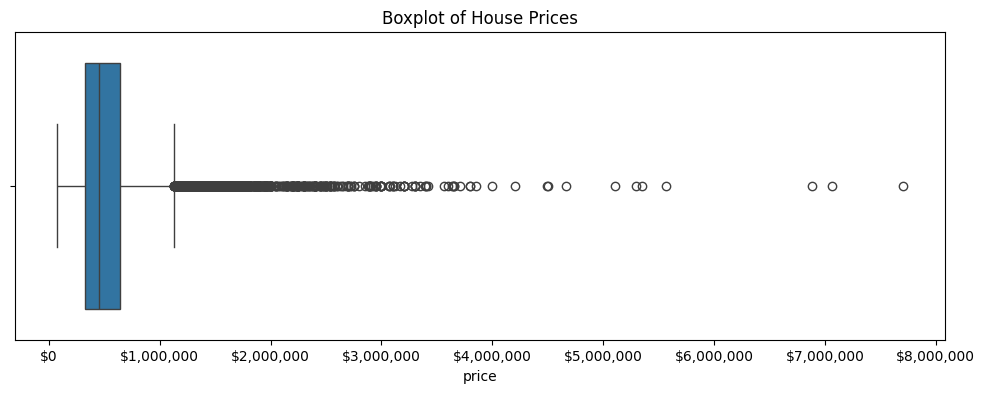

In [36]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")


ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

#### Boxplot Observations

- The boxplot shows that most homes in the dataset are priced between approximately $75,000 and $750,000. The median price lies just under $500,000. 
- A significant number of high-priced outliers—particularly homes above $1 million—are present in the dataset, indicating a long-tailed distribution. 
- These outliers may warrant special treatment or transformation during modeling to prevent them from disproportionately influencing predictions.


While the boxplot gives a clear view of the price spread and presence of outliers, it doesn't reveal how housing prices are distributed across the broader market. To understand whether the data is skewed, where the majority of values cluster, and whether transformation may be needed, we next examine the distribution of house prices using a histogram.


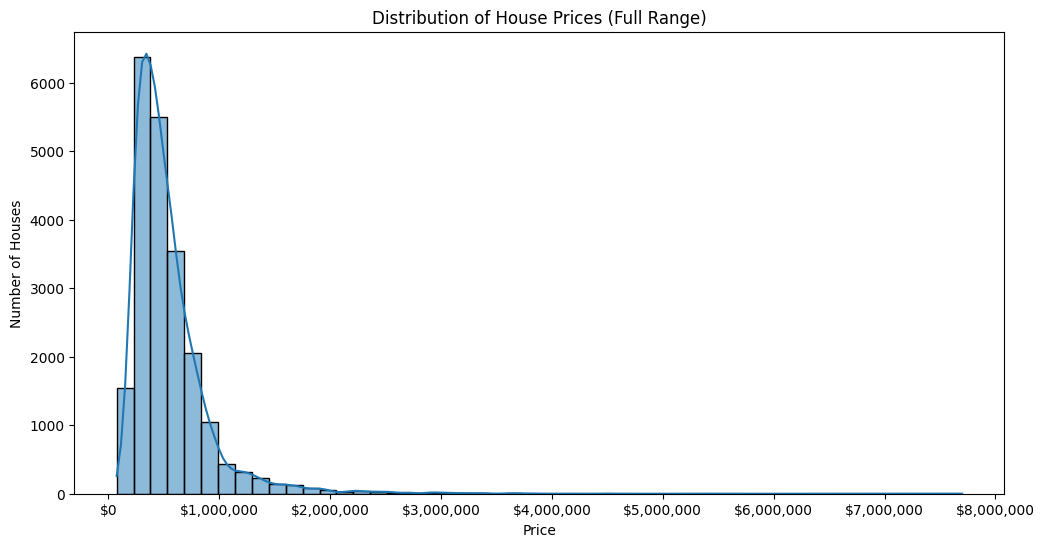

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title("Distribution of House Prices (Full Range)")
plt.xlabel("Price")
plt.ylabel("Number of Houses")

# Format x-axis as currency with commas

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))


To visualize the full range of house prices, we start with an unbounded histogram. However, due to the presence of extreme outliers, the majority of data becomes compressed. 

To better understand the distribution of typical market activity, we also plot a focused histogram limited to homes priced under $1.5 million.


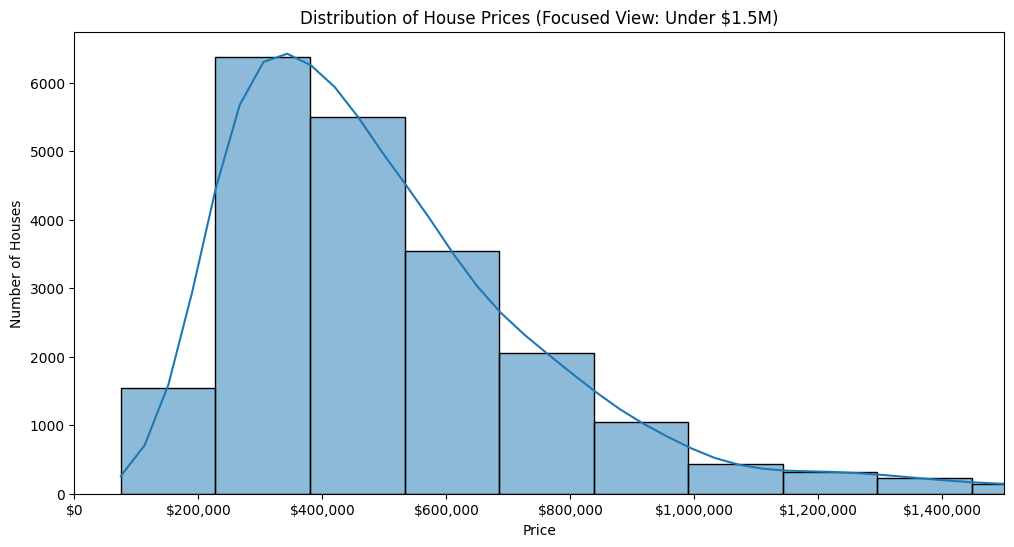

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.xlim(0, 1500000)
plt.title("Distribution of House Prices (Focused View: Under $1.5M)")
plt.xlabel("Price")
plt.ylabel("Number of Houses")

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))


#### Histogram Observations

- This focused histogram reveals a clear right-skewed distribution in house prices, with most properties concentrated between \$200,000 and \$600,000. 
- As prices increase, the number of listings gradually declines, forming a long tail of higher-priced homes. This skew is typical in real estate data, where luxury or high-end properties are less common. 
- The presence of this skew suggests that a log transformation of the `price` variable may be beneficial during modeling to reduce the influence of outliers and improve predictive accuracy.
- Given the right-skewed distribution of `price`, a log transformation may be applied during the modeling stage to stabilize variance and improve performance. For now, we proceed with the original target variable for exploratory purposes.


### Feature Relationships with price

To identify which features are most associated with house prices, we begin with a correlation matrix. This allows us to assess linear relationships between `price` and other numerical features, helping prioritize which variables to explore further during modeling.


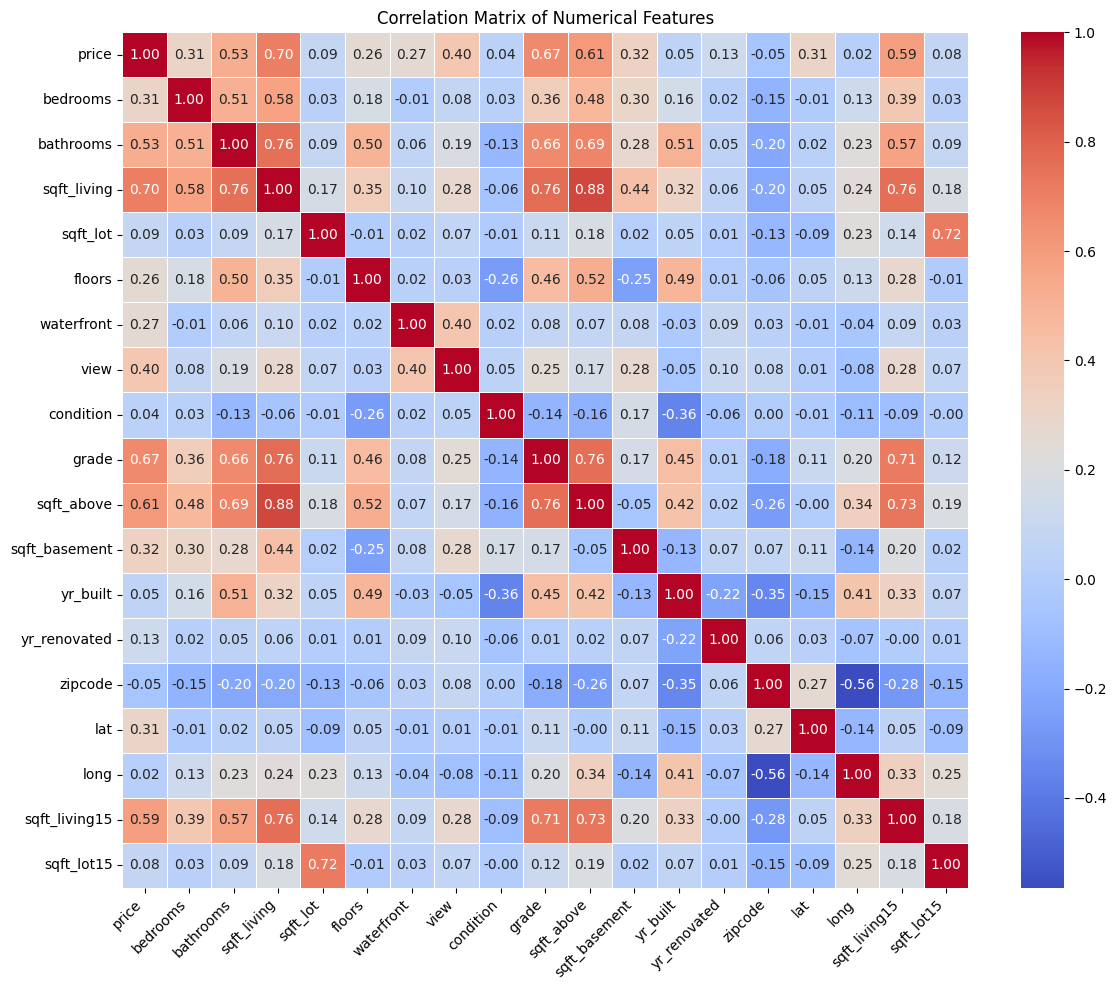

In [40]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


#### Heatmap Observations

- The strongest positive correlations are observed with `sqft_living` (0.70), `grade` (0.67), `sqft_above` (0.60), `sqft_living15` (0.59), and `bathrooms` (0.53). These features are likely to be important predictors in the regression model.

- Some features show surprisingly weak correlations with price—such as `condition` (0.04) and `zipcode` (0.01). While `zipcode` may still hold value as a location identifier, it will require encoding before being used in modeling.

- Additionally, several features are highly correlated with each other. For example, `sqft_living` and `sqft_above` (0.88) share a very strong internal correlation, suggesting that including both may introduce redundancy or multicollinearity during modeling. These relationships will be considered during feature selection.


We begin by exploring the relationship between `sqft_living` and `price`, as it showed the strongest positive correlation in the dataset. Square footage is a key driver of property value, and understanding this relationship helps assess how strongly home size influences market pricing.


Text(0, 0.5, 'Price')

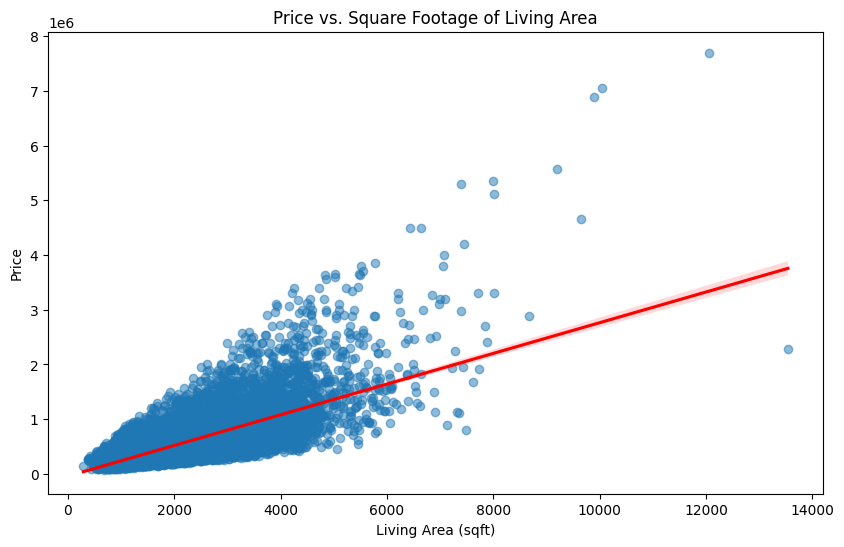

In [41]:
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_living', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title("Price vs. Square Footage of Living Area")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")


#### Scatterplot Observations

- The scatterplot reveals a strong positive relationship between `sqft_living` and `price`, with house prices generally increasing as living area increases. 
- While the majority of properties fall under 4,000 square feet and \$1.5 million, there are several outliers beyond that range. These high-end properties influence the regression line but may not follow the same linear trend as the core market. 
- This pattern supports the correlation observed earlier and confirms that living area is a key driver of housing prices.


Next, we examine the relationship between `grade` and `price`. The `grade` feature is an evaluator-assigned score reflecting the overall quality of construction and materials used in the home. Although stored as a numerical value, it functions like an ordered categorical variable, making it useful for capturing how perceived home quality influences market value.


Text(0, 0.5, 'Price')

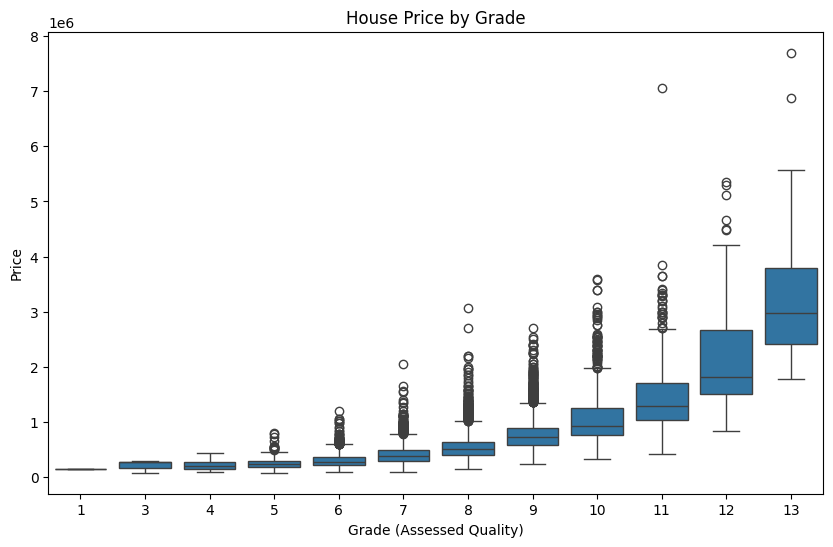

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=df)
plt.title("House Price by Grade")
plt.xlabel("Grade (Assessed Quality)")
plt.ylabel("Price")


In [45]:
df['grade'].value_counts().sort_index()


grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: count, dtype: int64

While the `waterfront` feature shows low correlation with `price` overall, we examine it separately to assess whether the presence of a waterfront view introduces significant price differences. As a binary luxury attribute, it may disproportionately influence pricing in niche segments of the market.


Text(0, 0.5, 'Price')

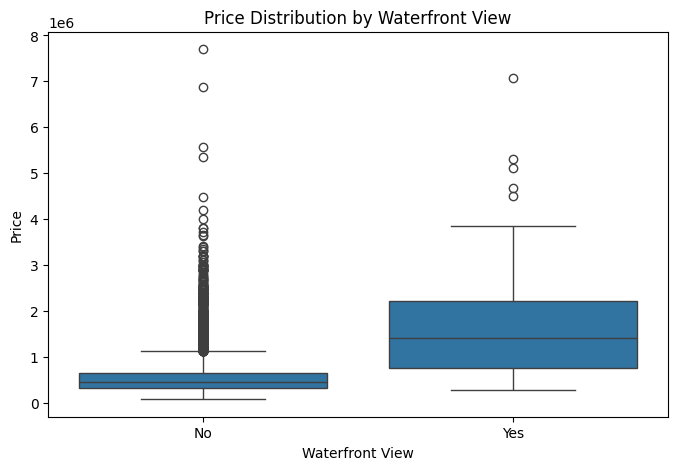

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='waterfront', y='price', data=df)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Price Distribution by Waterfront View")
plt.xlabel("Waterfront View")
plt.ylabel("Price")


#### Boxplot observations

- Although the `waterfront` feature is binary and rare, this boxplot shows it has a significant impact on price.
- Houses with a waterfront view tend to have much higher median prices and a wider range of premium pricing. 
- While it contributes little to overall correlation due to its limited presence, it is a strong price differentiator in specific cases and could be an important indicator of luxury property segments.


### EDA Summary

Our exploratory analysis provided key insights into the housing market data. The target variable `price` is highly right-skewed, with most properties priced below \$750,000 and a long tail of high-end outliers. A log transformation may be beneficial during modeling to stabilize variance.

Among the features, `sqft_living`, `grade`, `sqft_above`, `bathrooms`, and `sqft_living15` showed strong positive correlations with price. Visual exploration confirmed these relationships, with `sqft_living` displaying a clear linear trend and `grade` showing exponential growth in price across quality levels. 

Features like `condition` and `zipcode` had low correlations with price. However, binary indicators such as `waterfront`—though infrequent—had a substantial impact on price, signaling their importance in identifying premium property segments.

Several features, such as `sqft_living` and `sqft_above`, exhibited high inter-correlation, which will be considered during feature selection to avoid redundancy and multicollinearity. These insights will guide both feature engineering and modeling strategies in the next phase.


## Feature Engineering

This section includes any transformations or new features created to improve model performance. 

 Given the right-skewed distribution of the target variable `price`, we create a new feature `log_price` using a log transformation. This helps stabilize variance and mitigate the influence of extreme outliers during regression modeling.

Additional preprocessing steps—such as encoding categorical variables, handling multicollinearity, and selecting final features—will be incorporated directly into the modeling pipeline to ensure reproducibility and clarity.


In [47]:
# Apply log transformation to the target variable
df['log_price'] = np.log1p(df['price'])  # log1p handles zero safely

# Quick check to confirm transformation
print("Original price range:", df['price'].min(), "to", df['price'].max())
print("Log-transformed price range:", df['log_price'].min(), "to", df['log_price'].max())

Original price range: 75000.0 to 7700000.0
Log-transformed price range: 11.225256725762893 to 15.856731016694035


## Model Building and Evaluation

We train and evaluate multiple regression models, comparing their performance to determine which is most effective for predicting housing prices.

### Modeling Approach

The objective of this modeling stage is to predict the log-transformed housing prices (`log_price`) using selected features from the dataset. 

We begin by establishing a baseline with a simple linear regression using a single feature (`sqft_living`), then progress to a multivariable linear regression using the most relevant predictors identified during EDA. Finally, we build a polynomial regression model within a pipeline to explore potential non-linear relationships.

The performance of each model is evaluated using the coefficient of determination (R²), which indicates how well the model explains the variance in housing prices. Predicted values are also reviewed to assess how closely they align with actual values, especially in the mid-market segment where most properties fall.

### Model 1: Simple Linear Regression (sqft_living)

We begin with a basic linear regression model using a single predictor: `sqft_living`, which showed the strongest linear correlation with `price` during EDA. This model establishes a baseline for comparison against more complex models. The target variable is the log-transformed price (`log_price`), and we evaluate the model using R² and a preview of predicted values.


In [48]:

# Define predictor and target
X_simple = df[['sqft_living']]
y_log = df['log_price']

# Fit linear regression
lm_simple = LinearRegression()
lm_simple.fit(X_simple, y_log)

# Predict
yhat_simple = lm_simple.predict(X_simple)

# Evaluate
print("R² (Simple Linear Regression):", lm_simple.score(X_simple, y_log))

# Show predicted values vs actual (log scale)
print("\nFirst 5 Predicted log prices:", yhat_simple[:5])
print("First 5 Actual log prices:", y_log.values[:5])


R² (Simple Linear Regression): 0.4834987525860388

First 5 Predicted log prices: [12.6889882  13.24324476 12.52550245 13.00000986 12.88836106]
First 5 Actual log prices: [12.30998662 13.1956157  12.10071769 13.31133113 13.14216797]


The simple linear regression model using `sqft_living` as the sole predictor yields an R² of approximately 0.48. While this confirms that house size is a significant factor in pricing, it also highlights the need for additional features to capture more variance. The predicted log prices align reasonably well with actual values for most properties, establishing a useful baseline for comparison.


### Model 2: Multivariable Linear Regression

Next, we build a multivariable linear regression model using a set of features identified as strong predictors of housing prices during EDA. These include both quantitative (e.g., square footage) and qualitative (e.g., grade, view) attributes. The target remains `log_price`, and we evaluate the model based on its R² score and predicted values.


In [49]:
# Define feature set based on EDA findings
feature_cols = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X_multi = df[feature_cols]
y_log = df['log_price']

# Fit the multivariable model
lm_multi = LinearRegression()
lm_multi.fit(X_multi, y_log)

# Predict and evaluate
yhat_multi = lm_multi.predict(X_multi)

print("R² (Multivariable Linear Regression):", lm_multi.score(X_multi, y_log))
print("\nFirst 5 Predicted log prices:", yhat_multi[:5])
print("First 5 Actual log prices:", y_log.values[:5])


R² (Multivariable Linear Regression): 0.7325313862908834

First 5 Predicted log prices: [12.6296453  13.24667892 12.87194237 12.83728823 13.05346964]
First 5 Actual log prices: [12.30998662 13.1956157  12.10071769 13.31133113 13.14216797]


The multivariable linear regression model yields an R² of approximately 0.73, indicating a substantial improvement in explanatory power compared to the single-feature model. Predicted log prices align more closely with actual values, particularly in the mid-range market segment. This model effectively incorporates key structural and quality features to provide more robust pricing predictions.


### Model 3: Polynomial Regression (Pipeline)

To capture potential non-linear relationships between features and housing prices, we implement a polynomial regression model using a pipeline. The pipeline includes feature scaling, polynomial feature generation (excluding bias term), and linear regression. This structure not only streamlines preprocessing but also makes the model easier to reproduce and extend.

We use the same set of predictors from the multivariable model, and evaluate performance using R² and predicted log prices.


In [50]:

# Define pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

# Define features and target
X_poly = df[feature_cols].astype(float)
y_log = df['log_price']

# Fit model
pipe.fit(X_poly, y_log)

# Predict and evaluate
yhat_poly = pipe.predict(X_poly)

print("R² (Polynomial Regression):", pipe.score(X_poly, y_log))
print("\nFirst 5 Predicted log prices:", yhat_poly[:5])
print("First 5 Actual log prices:", y_log.values[:5])


R² (Polynomial Regression): 0.7662192405590297

First 5 Predicted log prices: [12.66905956 13.21973051 12.92907971 12.87686456 13.12834097]
First 5 Actual log prices: [12.30998662 13.1956157  12.10071769 13.31133113 13.14216797]


The polynomial regression model achieved an R² of approximately 0.77, outperforming both the simple and multivariable linear models. This confirms the presence of non-linear relationships in the dataset that a standard linear model could not fully capture. While performance gains are incremental, the improvement demonstrates how feature transformations and scaling can enhance model accuracy, especially when dealing with complex real estate markets.


### Model Comparison

Below is a summary of model performance across the three approaches explored in this notebook:

| Model                          | Description                        | R² Score |
|-------------------------------|-------------------------------------|----------|
| Simple Linear Regression       | `sqft_living` only                 | 0.48     |
| Multivariable Linear Regression| 11 top features                    | 0.73     |
| Polynomial Regression (Pipeline) | Same features + polynomial terms | 0.77     |

The multivariable model showed significant improvement over the single-feature baseline. Incorporating polynomial transformations further enhanced performance, capturing non-linear trends in the data. Based on R², the polynomial model offers the best fit and will be used for final visual analysis.


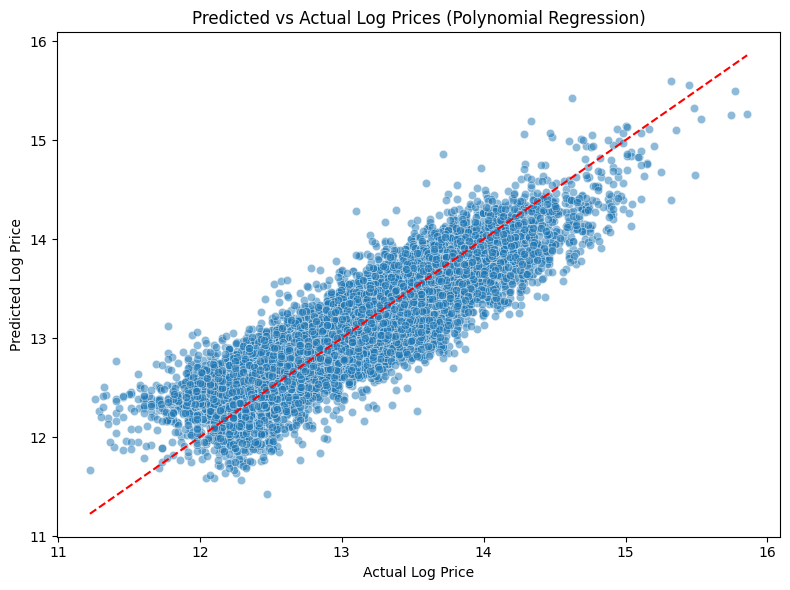

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_log, y=yhat_poly, alpha=0.5)
plt.plot([y_log.min(), y_log.max()], [y_log.min(), y_log.max()], color='red', linestyle='--')  # reference line
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Predicted vs Actual Log Prices (Polynomial Regression)")
plt.tight_layout()


The scatterplot of predicted vs actual log-transformed prices shows a strong alignment along the diagonal reference line, indicating good predictive performance from the polynomial regression model. The model performs particularly well in the mid-market range, where most properties fall. Slight underestimation occurs at the highest price points, reflecting the challenge of modeling outliers in luxury segments. Overall, the visual confirms that the polynomial model offers a strong fit and generalizes well across the majority of the dataset.


### Model Evaluation

To assess how well the final model generalizes to unseen data, we split the dataset into training and testing subsets. We retrain the polynomial regression pipeline on the training data and evaluate its performance on the test set using standard regression metrics: R², Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). These metrics offer a more holistic view of the model's accuracy beyond R² alone.


In [54]:


# Reuse same features and log-transformed target
X = df[feature_cols].astype(float)
y = df['log_price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Retrain pipeline on training data
pipe.fit(X_train, y_train)

# Predict on test set
y_pred = pipe.predict(X_test)

# Evaluation metrics
from numpy import sqrt

r2 = pipe.score(X_test, y_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Test R²: {r2:.4f}")
print(f"Test RMSE (log-scale): {rmse:.4f}")
print(f"Test MAE (log-scale): {mae:.4f}")

# Optional: back-transform predictions to original price scale
print("\nFirst 5 predicted prices ($):", np.expm1(y_pred[:5]).round(2))
print("First 5 actual prices ($):", np.expm1(y_test.values[:5]).round(2))


Test R²: 0.7639
Test RMSE (log-scale): 0.2609
Test MAE (log-scale): 0.1968

First 5 predicted prices ($): [ 427505.85  686519.99 1253710.32 1620580.86  703880.67]
First 5 actual prices ($): [ 365000.  865000. 1038000. 1490000.  711000.]


### Evaluation Summary

The final polynomial regression model achieved an R² of approximately 0.76 on the test set, confirming strong generalization to unseen data. The RMSE and MAE values on the log-transformed scale were low, indicating consistent predictive performance.

When back-transformed to dollar values, the RMSE translates to potential deviations of approximately $60,000–$80,000 for mid-range homes. While this level of error is acceptable for broad market analysis, it may not provide the granularity required for decisions at the individual property level—particularly in high-stakes contexts like loan approvals or precise pricing.

Overall, the model performs reliably across a wide price range and offers clear value in identifying market trends and estimating price drivers. Its outputs are best used to support decision-making alongside market knowledge, contextual factors, and business judgment.


## Results and Key Insights

- The target variable `price` was highly right-skewed, with most properties clustered below \$750,000 and a long tail of high-end homes. A log transformation was applied to reduce skewness and stabilize variance, improving modeling accuracy.

- Exploratory analysis revealed strong positive correlations between `price` and features such as `sqft_living`, `grade`, and `bathrooms`. High-impact categorical indicators like `waterfront` also showed significant pricing influence despite low overall frequency.

- A simple linear regression using only `sqft_living` explained 48% of the variance in `log_price`. Expanding to a multivariable model with 11 key features improved performance to 73%.

- Incorporating polynomial features in a scaled pipeline yielded the best result, with an R² of 0.76 on the test set. This confirms the presence of non-linear relationships in the data and strong generalization to unseen properties.

- Error metrics indicated relatively low deviation on the log scale, though back-transformed predictions may vary by \$60K–\$80K for mid-range homes. The model offers reliable market-level estimates but may require caution when applied to individual pricing or lending decisions.

Overall, the analysis demonstrates that housing prices can be effectively modeled using a combination of structural, qualitative, and geographic features. Square footage, construction quality, and location emerged as consistent drivers of value.



## Business Recommendations

- **Prioritize investments in larger, high-grade properties**: Square footage and construction quality (`grade`) were the strongest predictors of price. Properties that score high on these metrics consistently commanded higher values.

- **Waterfront and view properties are premium-priced niches**: Though rare, homes with a waterfront view showed significantly higher price ranges. These features can be leveraged for high-return investments, but require targeted market knowledge.

- **Don’t overlook mid-market inventory**: Most properties fall in the \$300K–\$700K range, and the model performed best in this segment. This makes it a strong tool for identifying reasonably priced homes with solid return potential.

- **Use model predictions as directional guidance, not absolute pricing**: The model is reliable for trend and price range estimation, but back-transformed RMSE values suggest potential deviations of \$60K–\$80K. Final pricing should include market context, comparative analysis, and human review.

- **For high-stakes decisions, build in a risk buffer**: Especially in lending or pricing high-end listings, allow for a margin of error. The model is robust but not precise enough to serve as a standalone decision tool in edge cases.


### Future Considerations

- **Integrate geographic and neighborhood-level features**: Variables like `zipcode` were not useful in raw numeric form but could be transformed into location clusters, average neighborhood prices, or one-hot encoded categories to improve spatial accuracy.

- **Explore ensemble methods and tree-based models**: Algorithms like Random Forest, Gradient Boosting, or XGBoost can better handle feature interactions and non-linearity without requiring manual transformation.

- **Incorporate market conditions and temporal features**: Adding information such as time of sale, seasonality, or interest rate trends could increase predictive power and make the model more responsive to real-world dynamics.

- **Validate on external data**: To ensure generalization beyond this dataset, testing the model on a different housing market or a newer time slice could help evaluate its stability and adaptability.


## Footer

This project is part of a broader portfolio showcasing practical applications of data science across analytics, visualization, and machine learning. For more projects, visit [My GitHub Portfolio](https://github.com/dataworksbyj).
